<a href="https://colab.research.google.com/github/ikabrain/UCS761-Deep-Learning-Lab/blob/main/DL_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Linear regression: Implement multiple linear regression using perceptron

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

In [2]:
np.random.seed(42)

## Import dataset

---

Link for dataset: https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset

In [3]:
import kagglehub

path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

Using Colab cache for faster access to the 'multiple-linear-regression-dataset' dataset.


In [4]:
df = pd.read_csv(path + "/multiple_linear_regression_dataset.csv")
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [5]:
df.shape

(20, 3)

In [6]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


### Analysing Distribution


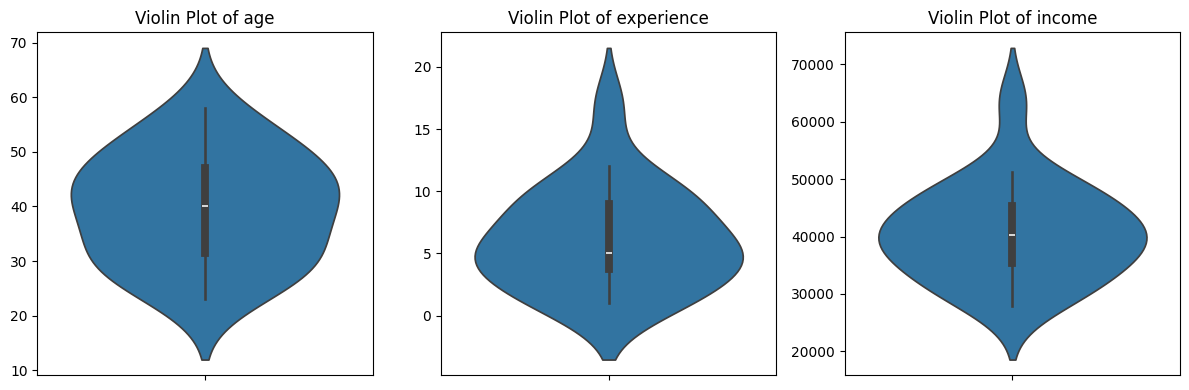

In [7]:
n_cols = df.shape[1]  # Number of columns for subplots

plt.figure(figsize=(n_cols * 4, 4))

for i, feature in enumerate(df.columns):
    plt.subplot(1, n_cols, i + 1)
    sns.violinplot(y=df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.ylabel('') # Remove y-axis label to avoid clutter

plt.tight_layout()
plt.show()

### Splitting & stratifying data

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop("income", axis=1).to_numpy()
y = df["income"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(
    f"Training data: {X_train.shape[0]}\n"
    f"Testing data: {X_test.shape[0]}\n"
)

Training data: 16
Testing data: 4



### Scaling Predictors

In [9]:
# Standardizing variables as they exhibit Gaussian symmetries
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

## Designing single-layer linear perceptron from scratch

---


For linear regression, the perceptron only needs to have an identity function for activation.

Now, we use MSE loss

$$
    \text{Mean Square Error} \quad MSE(y, \hat{y}) = \frac{1}{n}(y^{T}y - 2y^{T}\hat{y} + \hat{y}^{T}\hat{y})
$$

$$
    \Rightarrow
    \mathcal{L}_\beta(y, \hat{y}) = \frac{1}{}(y^{T}y - 2y^{T}\hat{y} + \hat{y}^{T}\hat{y})
$$

Taking derivative, we get
$$
    \frac{\partial\mathcal{L}}{\partial\beta}(y, \hat{y}) = -X^{T}y + X^{T}(X\beta + \beta_0) = -X^{T}(y - \hat{y})
$$
$$
    \text{and} \quad \frac{\partial\mathcal{L}}{\partial\beta_0}(y, \hat{y}) = -\sum_{i=1}^{n}`(y_{i} - \hat{y}_{i})
$$

In [10]:
class LinearPerceptron:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.epochs = n_iter
        self.weights = None
        self.bias = None
        self.trained = False

    def _initialize_weights(self, n_features):
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()
        return self.weights, self.bias

    def predict(self, X):
        """
        One forward pass with samples in X
        """
        return np.dot(X, self.weights) + self.bias

    def _mse_loss(self, y_true, y_pred):
        """Return the mean square error between matrices y_true and y_pred"""
        return np.mean((y_true - y_pred) ** 2)

    def _update_weights(self, input, error_vals):
        """Updates weights of the Linear Perceptron using gradients"""
        self.weights += self.lr * np.dot(input, error_vals)
        self.bias += self.lr * np.sum(error_vals)
        return (self.weights, self.bias)

    def fit(self, X, y):
        # 1. Initialize weights and bias
        n_samples, n_feat = X.shape
        self._initialize_weights(n_feat)

        for epoch in range(self.epochs):
            for sample_idx, sample in enumerate(X):
                # 2. Calculate linear output
                y_pred = self.predict(sample)

                # 3. Update weights and bias using gradients
                error = y[sample_idx] - y_pred
                self._update_weights(sample, error)

            if epoch % 10 == 0:
                full_predictions = self.predict(X)
                loss = self._mse_loss(y, full_predictions)
                print(f"Epoch {epoch}/{self.epochs}: Loss = {loss:.4f}")

        self.trained = True
        return self

    def __repr__(self):
        return f"LinearPerceptron(lr={self.lr}, n_iter={self.epochs}, trained={self.trained})"

## Using linear perceptron on dataset

---

In [11]:
%%time
p = LinearPerceptron(lr=0.01, n_iter=100)
p.fit(X_train, y_train)

Epoch 0/100: Loss = 1347283526.5389
Epoch 10/100: Loss = 55704216.8423
Epoch 20/100: Loss = 4327173.2012
Epoch 30/100: Loss = 1929007.5804
Epoch 40/100: Loss = 1762133.2955
Epoch 50/100: Loss = 1742966.2671
Epoch 60/100: Loss = 1740194.2953
Epoch 70/100: Loss = 1739823.6730
Epoch 80/100: Loss = 1739803.3293
Epoch 90/100: Loss = 1739818.5510
CPU times: user 32 ms, sys: 208 µs, total: 32.2 ms
Wall time: 57.1 ms


LinearPerceptron(lr=0.01, n_iter=100, trained=True)

In [12]:
y_pred = p.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2*100:.2f}%")

R2 score: 94.01%


In [13]:
# Testing on first row
print(f"Values of first record: {X[0]}")
print(f"Actual target: {y[0]:.2f}")
print(f"Predicted target: {p.predict(X[0]):.2f}")

Values of first record: [25  1]
Actual target: 30450.00
Predicted target: 28867.43
